In [87]:
import numpy as np
import pandas as pd
import math
from astropy.io import fits

annulus = 11
apeture = 4

numStars = 3769
data, header = fits.getdata('C:/Users/ronald.sumners/Desktop/KeplerSept4/6741412_32821711_processed.fits', header = True)

starData = pd.read_csv('./KeplerSept4/K01Extract.csv')
starData.columns = starData.columns.str.replace(' ', '')
starData = starData.set_index('#')

x = []
y = []
starName = starData['Name'][:numStars]
 
for i in range(numStars):
    name1 = starName.iloc[i]
    x.append(starData['X'][starData['Name'] == name1].reset_index(drop=True)[0])
    y.append(starData['Y'][starData['Name'] == name1].reset_index(drop=True)[0])
    if i%100 == 0:
        print(i)


C:\Users\ronald.sumners\AppData\Local\Temp\ipykernel_6124\4066342213.py:12: DtypeWarning: Columns (20) have mixed types. Specify dtype option on import or set low_memory=False.
  starData = pd.read_csv('./KeplerSept4/K01Extract.csv')


0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700


In [89]:
totalcheck = 0
exclude = []
for i in range(numStars):
    centery = int(x[i])
    centerx = int(y[i])
    segement = np.array(data[centerx-annulus:centerx+annulus+1, centery-annulus:centery+annulus+1])

    mask = np.ones((2*annulus+1, 2*annulus+1), dtype = bool)
    mask[(int(annulus) - apeture):(int(annulus) + 1 + apeture), (int(annulus) - apeture):(int(annulus) + 1 + apeture)] = False

    annulus_data = segement[mask]

    check = ((annulus_data < 20000).sum() == annulus_data.size).astype(int)
    totalcheck += check
    
    if check == 0:
        name = starName.iloc[i]
        exclude.append(name)
print(totalcheck)

exclusions = pd.DataFrame(data = {'Names': exclude})
exclusions.to_csv('FilteringExclusions.csv', index=False)

2895


In [90]:
centerx = 3471
centery = 2140
segement = np.array(data[centerx-annulus:centerx+annulus+1, centery-annulus:centery+annulus+1])

mask = np.ones((2*annulus+1, 2*annulus+1), dtype = bool)
mask[(int(annulus) - apeture):(int(annulus) + 1 + apeture), (int(annulus) - apeture):(int(annulus) + 1 + apeture)] = False

annulus_data = segement[mask]

check = ((annulus_data < 20000).sum() == annulus_data.size).astype(int)
totalcheck += check
print(check)

0


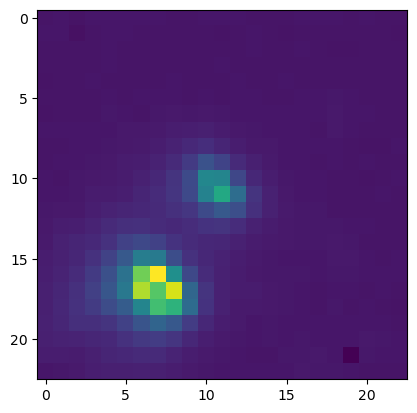

In [91]:
import matplotlib.pyplot as plt
plt.imshow(segement)


In [93]:
exclusions = pd.read_csv('FilteringExclusions.csv')['Names'].to_numpy()
print(exclusions)
print(len(exclusions))

starData = pd.read_csv('./KeplerSept4/K01Extract.csv')
print(starData.shape)
starData = starData[~starData['Name'].isin(exclusions)]
print(starData.shape)

starData.to_csv('starDataTest.csv', index=False)
print('done')

['K01-4' 'K01-9' 'K01-26' 'K01-41' 'K01-85' 'K01-89' 'K01-92' 'K01-95'
 'K01-98' 'K01-102' 'K01-107' 'K01-111' 'K01-116' 'K01-122' 'K01-126'
 'K01-127' 'K01-137' 'K01-139' 'K01-142' 'K01-155' 'K01-168' 'K01-203'
 'K01-217' 'K01-219' 'K01-233' 'K01-260' 'K01-284' 'K01-300' 'K01-313'
 'K01-316' 'K01-318' 'K01-319' 'K01-320' 'K01-321' 'K01-326' 'K01-333'
 'K01-336' 'K01-337' 'K01-343' 'K01-349' 'K01-352' 'K01-355' 'K01-363'
 'K01-365' 'K01-367' 'K01-369' 'K01-371' 'K01-384' 'K01-389' 'K01-406'
 'K01-409' 'K01-418' 'K01-432' 'K01-439' 'K01-441' 'K01-438' 'K01-447'
 'K01-458' 'K01-463' 'K01-466' 'K01-467' 'K01-469' 'K01-470' 'K01-472'
 'K01-477' 'K01-485' 'K01-484' 'K01-487' 'K01-492' 'K01-506' 'K01-503'
 'K01-527' 'K01-533' 'K01-538' 'K01-550' 'K01-571' 'K01-570' 'K01-577'
 'K01-590' 'K01-594' 'K01-598' 'K01-607' 'K01-614' 'K01-647' 'K01-648'
 'K01-650' 'K01-652' 'K01-687' 'K01-701' 'K01-702' 'K01-717' 'K01-723'
 'K01-737' 'K01-756' 'K01-764' 'K01-774' 'K01-780' 'K01-789' 'K01-793'
 'K01-7

C:\Users\ronald.sumners\AppData\Local\Temp\ipykernel_6124\3959399956.py:5: DtypeWarning: Columns (20) have mixed types. Specify dtype option on import or set low_memory=False.
  starData = pd.read_csv('./KeplerSept4/K01Extract.csv')


(180912, 43)
(138960, 43)
done
